In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

fashion_df = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_df
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_validation, y_validation = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
y_test.shape

(10000,)

In [5]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [6]:
X_train, X_validation, X_test = X_train / 255, X_validation / 255, X_test / 255

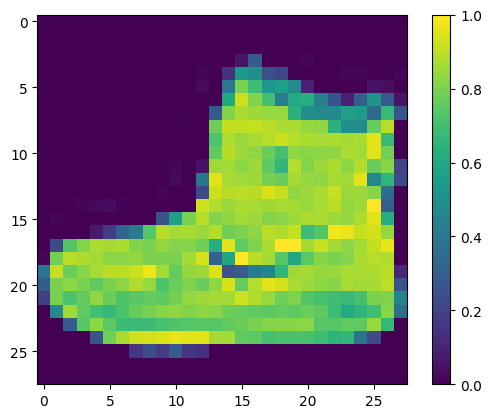

In [7]:
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Ankle boot'

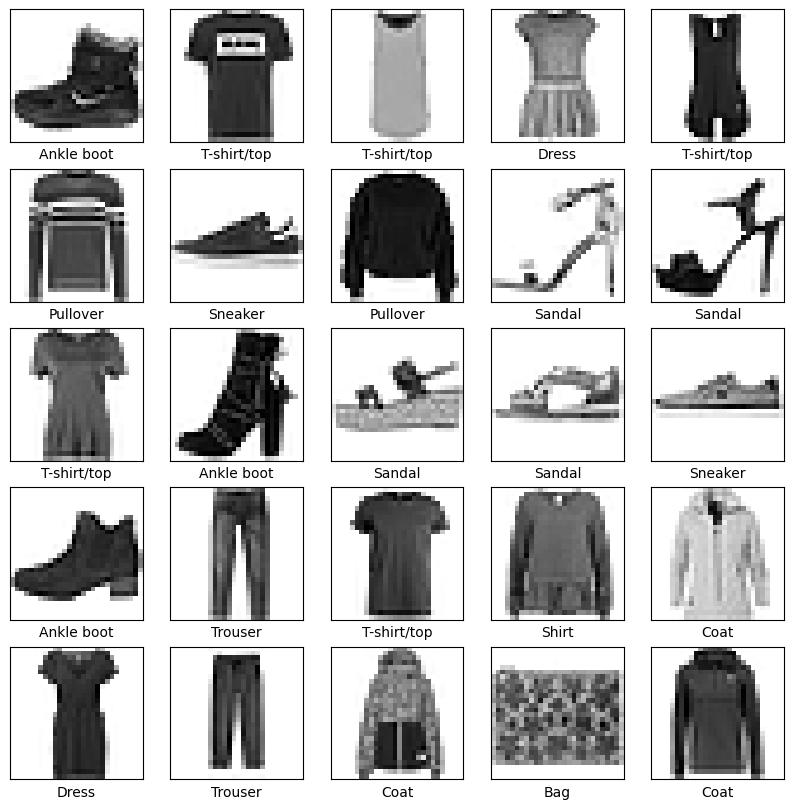

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03250059, -0.06315911,  0.04944561, ..., -0.00544517,
         0.04739758, -0.04914895],
       [ 0.04482464, -0.02777831, -0.06585826, ...,  0.01769134,
         0.02783701,  0.02584753],
       [ 0.07063824,  0.0525535 ,  0.0252881 , ...,  0.02562618,
        -0.03351392, -0.02992183],
       ...,
       [ 0.00086335, -0.03901216, -0.02341006, ..., -0.05284554,
         0.02324778,  0.04402374],
       [-0.01768624, -0.03360679,  0.03910523, ...,  0.01865501,
         0.06188968, -0.03938409],
       [ 0.04367902,  0.06281906,  0.06776512, ..., -0.02314948,
        -0.01515198,  0.02456397]], dtype=float32)

In [16]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_validation, y_validation))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 920us/step - accuracy: 0.6810 - loss: 0.9980 - val_accuracy: 0.8256 - val_loss: 0.5139
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.8239 - loss: 0.5095 - val_accuracy: 0.8370 - val_loss: 0.4624
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8415 - loss: 0.4574 - val_accuracy: 0.8436 - val_loss: 0.4373
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8519 - loss: 0.4278 - val_accuracy: 0.8482 - val_loss: 0.4234
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.8580 - loss: 0.4064 - val_accuracy: 0.8518 - val_loss: 0.4114
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.8640 - loss: 0.3894 - val_accuracy: 0.8552 - val_loss: 0.4027
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.8684 - loss: 0.3749 - val_accuracy: 0.8574 - val_loss: 0.3938
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.8714 - l

In [18]:
score1 =  model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.3678150475025177
Test accuracy: 0.8733999729156494


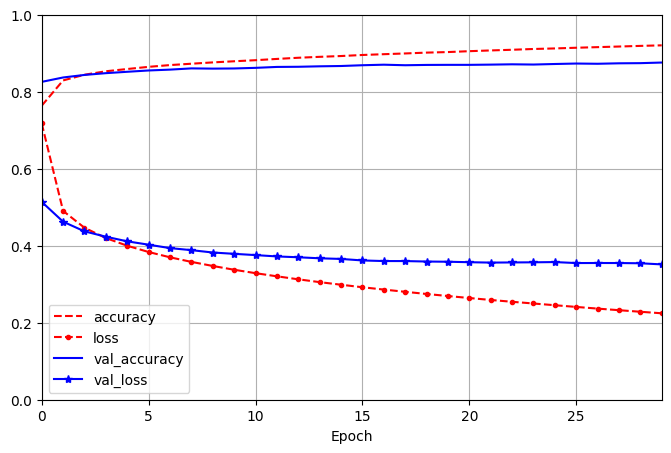

In [19]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

##### Results
Both the training accuracy and the validation accuracy increase steadily during training, whereas the training loss and validation loss decrease. The curves are relatively close but show signs of overfitting although little. The training set preformance beats the validation set performance. The gap between training and validation accuracy remains small, indicating good generalization.

In [20]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

In [22]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history2 = model2.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6507 - loss: 1.0273 - val_accuracy: 0.8162 - val_loss: 0.5070
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8073 - loss: 0.5404 - val_accuracy: 0.8240 - val_loss: 0.4732
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8305 - loss: 0.4746 - val_accuracy: 0.8450 - val_loss: 0.4241
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8459 - loss: 0.4309 - val_accuracy: 0.8588 - val_loss: 0.3848
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8596 - loss: 0.3982 - val_accuracy: 0.8700 - val_loss: 0.3606
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8690 - loss: 0.3723 - val_accuracy: 0.8770 - val_loss: 0.3427
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8739 - loss: 0.3539 - val_accuracy: 0.8832 - val_loss: 0.3275
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8794 - loss: 0

In [28]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.2524847686290741
Test accuracy: 0.9093000292778015


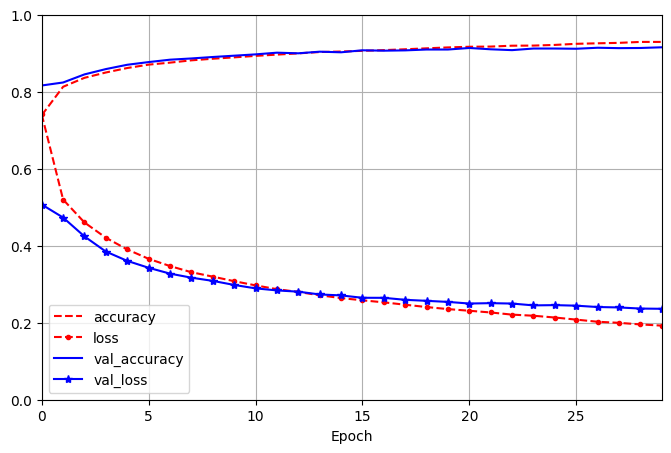

In [37]:
pd.DataFrame(history2.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

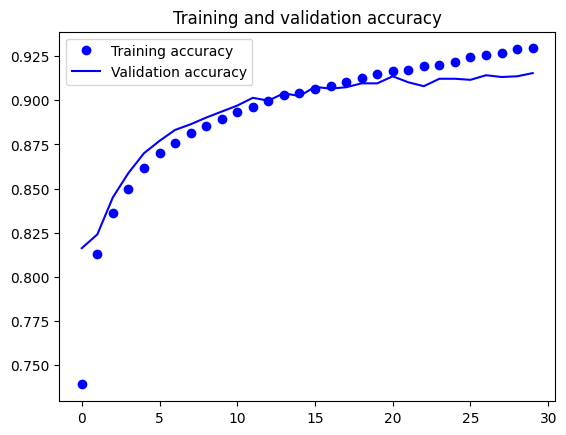

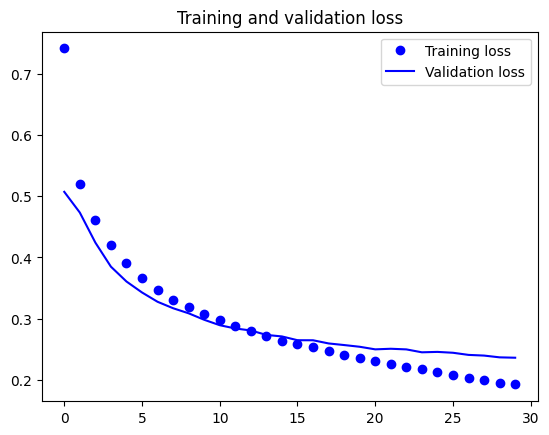

In [38]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### Results
Training Accuracy consistently increases as the number of epochs progresses, reaching around 92.5% at the 30th epoch. Validation Accuracy also rises initially, closely following the training accuracy curve, but seems to plateau around 91% after approximately 15-20 epochs. The gap between training and validation accuracy is small, indicating a well-performing model with minimal overfitting.

In [34]:
y_proba = model.predict(X_test)
y_pred = y_proba.argmax(axis=-1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


array([9, 2, 1, ..., 8, 1, 5])

In [35]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [36]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)